(sem-intro-notebook)=
# Introduzione ai Modelli SEM

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("lavaanExtra")
    library("lavaanPlot")
    library("psych")
    library("dplyr") 
    library("tidyr")
    library("knitr")
    library("mvnormalTest")
    library("semPlot")
    library("DiagrammeRsvg")
    library("rsvg")
    library("effectsize")
})
set.seed(42)

Warning message in file(filename, "r", encoding = encoding):
“non è possibile aprire il file '_common.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): non è possibile aprire la connessione


Dopo aver esplorato in dettaglio l'analisi fattoriale, sia esplorativa che confermativa, il presente capitolo si addentra nel mondo dei Modelli di Equazioni Strutturali (SEM), un avanzamento significativo nell'ambito dell'analisi multivariata. I SEM permettono non solo di identificare e misurare le variabili latenti, come nella analisi fattoriale, ma anche di esplorare e quantificare le relazioni di regressione che intercorrono tra di esse. 

Il fulcro dei SEM è testare una teoria specificando un modello che rappresenti le predizioni di questa teoria, utilizzando costrutti plausibili misurati con variabili osservate adeguate. In questo senso, i SEM rappresentano un ponte cruciale tra la teoria e l'osservazione, consentendo di tradurre concetti astratti in entità misurabili e di esaminare le interdipendenze tra di essi in maniera strutturata e teoricamente fondata.

È fondamentale, tuttavia, mantenere una prospettiva critica riguardo all'utilizzo dei SEM. Come ogni modello statistico, anche i SEM sono basati su semplificazioni e approssimazioni della realtà. Questo porta al celebre adagio: "Tutti i modelli sono sbagliati, ma alcuni sono utili". Questa affermazione sottolinea l'importanza di riconoscere che, sebbene un modello possa adattarsi bene ai dati, non è necessariamente una rappresentazione accurata della realtà. 

Spesso, modelli fortemente sbagliati possono mostrare un buon fit con i dati, portando a conclusioni errate o fuorvianti. Di conseguenza, la procedura di selezione dei modelli non è solo un esercizio statistico, ma diventa un metodo per sviluppare e affinare teorie migliori. La critica e la revisione dei modelli, basate su dati empirici e considerazioni teoriche, sono dunque componenti essenziali del processo scientifico nel campo della psicologia e delle scienze sociali.

In conclusione, i SEM offrono un potente strumento per l'analisi e l'interpretazione dei dati in psicologia, ma il loro utilizzo richiede un attento equilibrio tra comprensione teorica, competenza statistica e senso critico. Attraverso un approccio ponderato e informato, i SEM possono contribuire significativamente allo sviluppo della ricerca psicologica, guidando verso una comprensione più profonda dei fenomeni studiati.

Per introdurre i modelli SEM iniziamo a considerare il caso più semplice, ovvero il modello di regressione multipla espresso come un modello di equazioni strutturali. Utilizzeremo un campione di dati reali e ci concentreremo sulle 3 sottoscale del DASS-21: ansia, stress e depressione. Il campione è costituito da 526 studenti universitari di psicologia.

In [15]:
dat <- read.csv("data/dass_rosenberg_scs.csv", header = TRUE)
dat |>
    head()

,stress,anxiety,depression,rosenberg,self_kindness,common_humanity,mindfulness,self_judgment,isolation,over_identification,scs_ts
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,7,6,4,31,17,16,16,11,8,10,98
2,3,2,1,32,14,14,16,16,11,13,82
3,1,0,1,31,20,16,16,13,6,9,102
4,12,11,13,34,12,6,6,10,7,15,70
5,10,6,12,25,16,17,13,17,16,18,73
6,5,1,2,31,14,14,10,12,8,11,85


In [3]:
dim(dat)

[1] 526  11

Esaminiamo i diagrammi di dispersione tra le varie misure presenti nel campione per verificare che la relazione tra le variabili sia lineare.

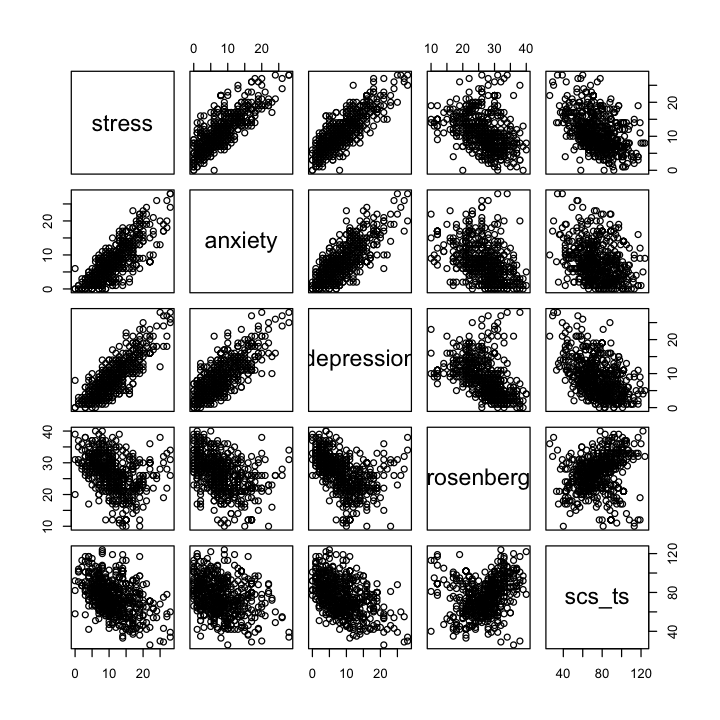

In [34]:
d_mr <- dat |>
    dplyr::select(stress, anxiety, depression, rosenberg, scs_ts)

pairs(d_mr)


In [35]:
y <- d_mr$scs_ts |> as.matrix()
dim(y)

[1] 526   1

### Modello di Regressione Multipla

Il modello generale di regressione lineare multipla (MLR) può essere espresso tramite la seguente equazione:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi} + \epsilon_i 
$$

dove $ i = 1, \ldots, N $ rappresenta l'osservazione $i$-esima, $ \beta_0 $ è il parametro di intercetta, $ \beta_1, \ldots, \beta_p $ sono i coefficienti di regressione, e $ \epsilon_i $ è un termine di errore per la risposta $i$. Inoltre, si assume che il termine di errore sia indipendente da tutte le variabili esplicative (o regressori) $ X_s $.

In questa formulazione, ogni $ y_i $ rappresenta il valore della variabile dipendente per l'osservazione $i$-esima, i $ \beta $ rappresentano i coefficienti che misurano l'impatto di ciascuna variabile esplicativa sulla variabile dipendente, e $ \epsilon_i $ cattura l'errore o la varianza non spiegata nella previsione di $ y_i $. Questa struttura permette di modellare la relazione lineare tra una variabile dipendente e più variabili indipendenti.

Il modello di regressione lineare multipla (MLR) espresso nell'equazione precedente viene spesso rappresentato nella seguente forma matriciale:

$$
y = X\beta + \epsilon 
$$

dove $ y $ è un vettore $ N \times 1 $ della variabile di risposta osservata, $ X $ è una matrice di progettazione (o design matrix) $ N \times (p+1) $ che include tutte le $ p $ variabili esplicative, con la prima colonna composta da 1 che rappresenta l'intercetta (cioè, $ \beta_0 $), $ \beta = (\beta_0, \beta_1, \ldots, \beta_p) $ è un vettore di $ (p+1) $ parametri di regressione, e $ \epsilon $ è il termine di errore. Specificamente, la matrice $ X $ e i vettori $ y $ e $ \epsilon $ sono definiti come segue:

$$
y = 
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}, \quad
\epsilon = 
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_N
\end{pmatrix}, \quad
X = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{p1} \\
1 & x_{12} & \cdots & x_{p2} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{1N} & \cdots & x_{pN}
\end{pmatrix} 
$$

In questa rappresentazione, ogni riga della matrice $ X $ corrisponde a un'osservazione e contiene i valori delle variabili esplicative per quell'osservazione, con una colonna aggiuntiva di 1 per l'intercetta. Il modello in forma matriciale consente un calcolo più efficiente dei parametri di regressione e una gestione più diretta delle relazioni tra variabili multiple.

### Metodo dei Minimi Quadrati

Fondamentalmente, stimando il parametro $ \beta $, cerchiamo di trovare valori (cioè, stime) per gli elementi in $ \beta $ in modo tale che la componente sistematica (cioè, $ X\beta $) spieghi quanto più possibile la variazione nella risposta (cioè, $ y $). In un certo senso, si tratta di trovare valori dei parametri che rendano l'errore il più piccolo possibile. In statistica, questo viene definito come stima dei minimi quadrati, cioè trovare $ \beta $ in modo che la somma degli errori al quadrato sia il più piccola possibile. Matematicamente, la stima dei minimi quadrati (LSE) di $ \beta $, indicata con $ \hat{\beta} $, si ottiene minimizzando la somma degli errori al quadrato (SSE):

$$
\text{SSE} = \epsilon_i^2 = \epsilon' \epsilon = (y - X\beta)'(y - X\beta) = y'y - 2\beta X'y + \beta'X'X\beta
$$

Prendendo la derivata della somma degli errori al quadrato (SSE) rispetto a $ \beta $ e impostandola a zero, si ottiene:

$$
X'X\hat{\beta} = X'y \quad (1.5)
$$

Se $ X'X $ è invertibile, allora abbiamo:

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

In pratica, questo processo di minimizzazione degli errori al quadrato è fondamentale per la stima dei coefficienti nel modello di regressione lineare multipla. Lo scopo è di identificare i valori dei parametri che meglio descrivono la relazione tra le variabili indipendenti e la variabile dipendente, riducendo al minimo la discrepanza tra i valori osservati e quelli previsti dal modello.

Esaminiamo questi calcoli nel caso dei dati in considerazione.

In [36]:
dass <- d_mr |>
    dplyr::select(depression, anxiety, stress)

In [37]:
X <- model.matrix(~ depression + anxiety + stress, data = dass)
head(X)

,(Intercept),depression,anxiety,stress
1,1,4,6,7
2,1,1,2,3
3,1,1,0,1
4,1,13,11,12
5,1,12,6,10
6,1,2,1,5


In [38]:
beta <- solve(t(X) %*% X) %*% t(X) %*% y
print(beta)

                  [,1]
(Intercept) 91.3611064
depression  -1.4841573
anxiety      1.0493140
stress      -0.9733368


Verifichiamo i calcoli eseguiti usando la funzione `lm()`:

In [39]:
fm <- lm(scs_ts ~ depression + anxiety + stress, data = d_mr)
print(coef(fm))

(Intercept)  depression     anxiety      stress 
 91.3611064  -1.4841573   1.0493140  -0.9733368 


I valori predetti sono calcolati come:

In [40]:
yhat <- X %*% beta
cor(yhat, fm$fitted.values)

1


I residui si ottengono nel modo seguente:

In [41]:
e <- d_mr$scs_ts - yhat
cor(e, fm$res)

1


La somma dei quadrati dei residui (Residual Sum of Squares, RSS) è definita nel modo seguente:

In [42]:
RSS <- t(e) %*% e

La stima della varianza dei residui è data da:

In [43]:
var_e <- RSS / (length(y) - dim(X)[2])

dove al denominatore abbiamo i gradi di libertà.

L'errore standard della regressione è dunque dato da:

In [44]:
sqrt(var_e)

15.70196


Verifichiamo:

In [45]:
summary(fm)


Call:
lm(formula = scs_ts ~ depression + anxiety + stress, data = d_mr)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.803 -12.000  -0.348  10.739  43.669 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  91.3611     1.6231  56.288  < 2e-16 ***
depression   -1.4842     0.2376  -6.247 8.69e-10 ***
anxiety       1.0493     0.2103   4.990 8.22e-07 ***
stress       -0.9733     0.2553  -3.813 0.000154 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.7 on 522 degrees of freedom
Multiple R-squared:  0.247,	Adjusted R-squared:  0.2426 
F-statistic: 57.06 on 3 and 522 DF,  p-value: < 2.2e-16


Infine, il coefficiente di determinazione nel modello di regressione multipla ha la stessa definizione di quello incontrato nella regressione bivariata:

In [46]:
R2 <- (sum((yhat - mean(y))^2)) / (sum((y - mean(y))^2)) 
R2

[1] 0.2469619

### Modello di Percorso

Formuliamo ora il modello di regressione multipla nei termini della path analysis.

In [47]:
mod_mr <- "
  scs_ts ~ anxiety + depression + stress
"

Adattiamo il modello ai dati usando `lavaan`:

In [48]:
fit_mr <- lavaan::sem(mod_mr, d_mr)

Esaminiamo i parametri ottenuti in questo modo:

In [49]:
parameterEstimates(fit_mr)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
scs_ts,~,anxiety,1.0493140,0.2094644,5.009509,5.456903e-07,0.6387713,1.4598568
scs_ts,~,depression,-1.4841573,0.2366792,-6.270754,3.593039e-10,-1.9480401,-1.0202745
scs_ts,~,stress,-0.9733368,0.2543128,-3.827321,1.295457e-04,-1.4717808,-0.4748928
scs_ts,~~,scs_ts,244.6766292,15.0874073,16.217275,0.000000e+00,215.1058543,274.2474041
anxiety,~~,anxiety,32.0817418,0.0000000,NA,NA,32.0817418,32.0817418
anxiety,~~,depression,24.5464225,0.0000000,NA,NA,24.5464225,24.5464225
anxiety,~~,stress,24.5381096,0.0000000,NA,NA,24.5381096,24.5381096
depression,~~,depression,31.4182365,0.0000000,NA,NA,31.4182365,31.4182365
depression,~~,stress,25.6615608,0.0000000,NA,NA,25.6615608,25.6615608


Si noti che i parametri stimati in questo modo sono praticamente identici a quelli trovati con il metodo della massima verosimiglianza.

### Path Analysis e Scomposizione della Covarianza

L'obiettivo principale dei modelli SEM (Structural Equation Modeling) è quello di identificare coefficienti di percorso che permettano di ricostruire le covarianze osservate nel modello. Questo viene fatto attraverso la somma degli effetti diretti e indiretti, come specificato dal modello. Per esemplificare, consideriamo la covarianza tra il punteggio totale di self-compassion e il livello di ansia, come indicato dal DASS-21.

In questo contesto, l'effetto diretto si riferisce alla relazione diretta tra ansia e auto-compassione. Tuttavia, ci sono anche effetti indiretti che contribuiscono a questa relazione. Uno di questi effetti indiretti proviene dalla covarianza tra ansia e depressione, combinata con l'influenza della depressione sull'auto-compassione. Un altro effetto indiretto deriva dalla covarianza tra ansia e stress, combinata con l'effetto dello stress sull'auto-compassione.

In sostanza, nel modello SEM, la covarianza totale tra self-compassion e ansia è quindi una funzione:
1. Dell'effetto diretto dell'ansia sull'auto-compassione.
2. Dell'effetto combinato di ansia e depressione sull'auto-compassione.
3. Dell'effetto combinato di ansia e stress sull'auto-compassione.

Questi effetti vengono calcolati e sommati per fornire una stima complessiva della covarianza tra i due costrutti, offrendo una visione più olistica e dettagliata delle dinamiche psicologiche in gioco.

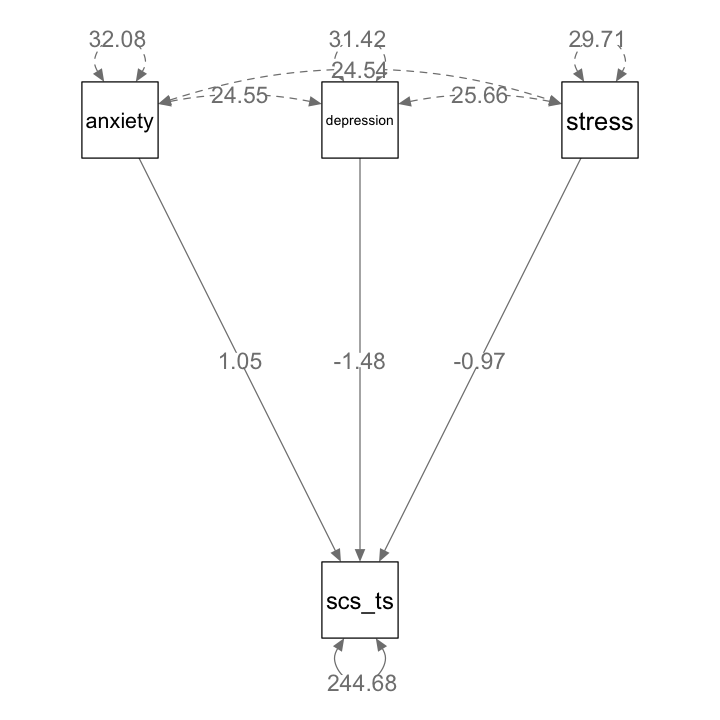

In [50]:
semPaths(fit_mr,
    whatLabels = "est",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

In [52]:
# Coefficients from the model
beta_anxiety_scs_ts <- 1.0493140 # Coefficient for anxiety predicting scs_ts
beta_depression_scs_ts <- -1.4841573 # Coefficient for depression predicting scs_ts
beta_stress_scs_ts <- -0.9733368 # Coefficient for stress predicting scs_ts

# Covariances from the model
cov_anxiety_depression <- 24.5464225
cov_anxiety_stress <- 24.5381096
cov_depression_stress <- 25.6615608

# Assuming the variances of anxiety, depression, and stress
var_anxiety <- 32.0817418
var_depression <- 31.4182365
var_stress <- 29.7137880

# Predicted covariance between anxiety and scs_ts
predicted_cov_anxiety_scs_ts <- 
    beta_anxiety_scs_ts * var_anxiety +
    beta_depression_scs_ts * cov_anxiety_depression +
    beta_stress_scs_ts * cov_anxiety_stress

# Output the predicted covariance
print(predicted_cov_anxiety_scs_ts)


[1] -26.65078


Verifichiamo:

In [53]:
cov(d_mr$anxiety, d_mr$scs_ts)

[1] -26.70154

Lo stesso procedimento si usa per le altre componenti della matrice di varianza/covarianza dei dati.

Procediamo ora ad utilizzare le tre sotto-scale della DASS-21 (Depression, Anxiety, and Stress Scale) per costruire una variabile latente che rappresenti il malessere psicologico. In modo analogo, le sei sotto-scale della Self-Compassion Scale verranno impiegate per definire un fattore latente di autocompassione. Sulla base dell'ipotesi che l'autocompassione agisca come un fattore di protezione contro il malessere psicologico, introduciamo una relazione di regressione tra questi due fattori, con il fattore di malessere psicologico in qualità di variabile endogena e il fattore di autocompassione come variabile esogena. Prevediamo che il coefficiente di regressione associato a questa relazione sia negativo, riflettendo l'effetto mitigante dell'autocompassione sul malessere psicologico. Questa specificazione modellistica mira a esplorare e quantificare la natura della relazione tra autocompassione e benessere psicologico, fornendo un quadro più chiaro di come queste dinamiche interagiscono nel contesto psicologico.

In [16]:
mod_sc <- "
  F =~ anxiety + depression + stress
  SC =~ self_kindness	+ common_humanity	+ mindfulness	+ self_judgment	+ isolation	+ over_identification
  F ~ SC 
"

Adattiamo il modello ai dati.

In [17]:
fit_sc <- lavaan::sem(mod_sc, dat)

Esaminiamo la soluzione ottenuta.

In [63]:
standardizedSolution(fit_sc)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,=~,anxiety,0.8472913,0.01448245,58.504699,0.00000e+00,0.81890621,0.8756764
F,=~,depression,0.9093646,0.01102220,82.502996,0.00000e+00,0.88776151,0.9309677
F,=~,stress,0.9294299,0.01010854,91.945022,0.00000e+00,0.90961756,0.9492423
SC,=~,self_kindness,0.7571629,0.02227974,33.984374,0.00000e+00,0.71349538,0.8008303
SC,=~,common_humanity,0.6205102,0.02998337,20.695145,0.00000e+00,0.56174384,0.6792765
SC,=~,mindfulness,0.6889035,0.02625941,26.234539,0.00000e+00,0.63743598,0.7403710
SC,=~,self_judgment,-0.7700739,0.02151074,-35.799516,0.00000e+00,-0.81223418,-0.7279136
SC,=~,isolation,-0.7702259,0.02150168,-35.821664,0.00000e+00,-0.81236837,-0.7280833
SC,=~,over_identification,-0.7674187,0.02166901,-35.415503,0.00000e+00,-0.80988921,-0.7249483


1. **Saturazioni Fattoriali (Loadings) per le Variabili Latenti:**
   - **F:** Le variabili osservate "anxiety", "depression", e "stress" hanno elevate saturazioni fattoriali sulla variabile latente "F". Questo suggerisce che ciascuna di queste misure è un buon indicatore della variabile latente "F".
   - **SC:** Le variabili "self_kindness", "common_humanity", "mindfulness", "self_judgment", "isolation", e "over_identification" hanno anch'esse significative saturazioni sulla variabile latente "SC". Si noti che "self_judgment", "isolation", e "over_identification" hanno saturazioni negative, indicando che queste variabili sono inversamente associate con "SC".

2. **Regressione tra Variabili Latenti:**
   - La relazione di regressione tra "F" e "SC" mostra un coefficiente negativo (-0.48), il che indica una relazione inversa tra queste due variabili latenti. Questo significa che livelli più alti di "SC" sono associati a livelli più bassi di "F".

3. **Varianza delle Variabili Latenti:**
   - La varianza di "F" e "SC" indica quanto della variazione nelle variabili latenti è spiegata dai loro rispettivi indicatori. La varianza di "F" (0.77) è relativamente alta, suggerendo che gli indicatori spiegano una buona parte della varianza in "F". La varianza di "SC" è fissata a 1, un approccio comune per identificare il modello.

4. **Varianze Residue degli Indicatori:**
   - Le varianze residue (ad esempio, "anxiety ~~ anxiety") rappresentano la varianza non spiegata in ciascun indicatore dalle variabili latenti. Valori più bassi indicano che la variabile latente spiega una maggior parte della varianza dell'indicatore. Ad esempio, "anxiety" ha una varianza residua di 0.28, suggerendo che "F" spiega una buona parte, ma non tutta, della varianza in "anxiety".

Generiamo una rappresentazione grafica del modello.

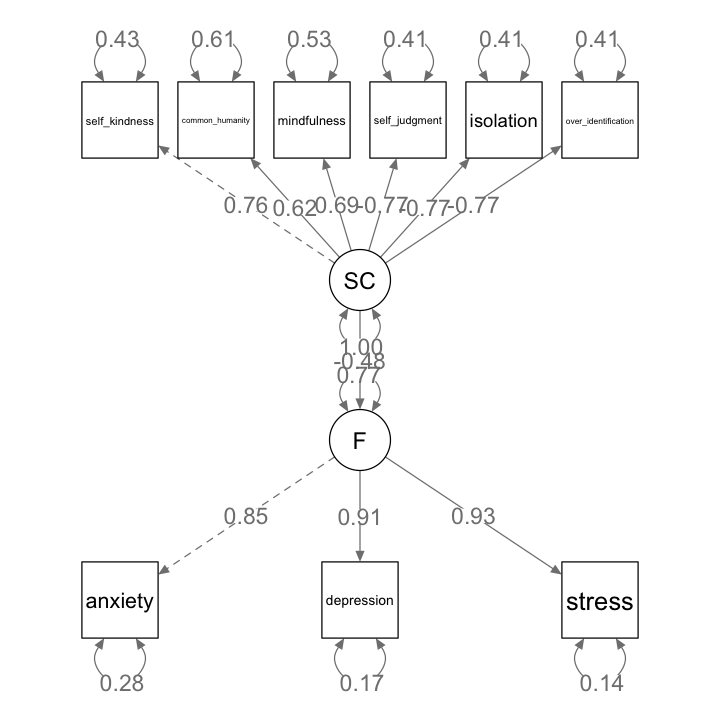

In [64]:
semPaths(fit_sc,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

I coefficienti stimati nel modello SEM appaiono coerenti e in linea con le aspettative, in particolare il coefficiente che descrive l'effetto "causale" del fattore dell'autocompassione sul malessere psicologico, che si attesta a -0.48. Questo valore negativo corrobora l'ipotesi secondo cui l'autocompassione svolge un ruolo di fattore protettivo contro il malessere psicologico. Tuttavia, prima di confermare definitivamente questa conclusione, è cruciale esaminare gli indici di bontà di adattamento del modello. Questi indici ci permetteranno di valutare quanto accuratamente il modello SEM si adatta ai dati osservati, fornendo un quadro più chiaro della validità delle nostre inferenze. In altre parole, sebbene il modello suggerisca una relazione negativa tra autocompassione e malessere psicologico, la conferma finale di questa associazione dipenderà dall'adeguatezza complessiva del modello rispetto ai dati. Questo argomento verrà affrontato nel prossimo capitolo.

## Oltre la regressione multipla

In generale, lo psicologo ha a che fare con diagrammi di percorso nei quali sono presenti variabili non osservabili (latenti) e quindi l'approccio della regressione multipla non può essere applicato, come nel caso precedente. Esaminiamo qui una secondo esempio. Weiss,  Forkus,  Contractor, e Schick (2018) esaminano con una path analisi la relazione tra la difficiltà di regolare le emozioni positive e l'abuso di alcol e di sostanze. 

- La difficoltà di regolare le emozioni positive viene misurata con la  *Difficulties in Emotion Regulation Scale – Positive* (DERS-P; Weiss, Gratz, & Lavender, 2015), che comprende le sottoscale di Acceptance, Impulse, e Goals.
- L'abuso di sostanze viene misurato con la *Drug Abuse Screening Test* (DAST; Skinner, 1982).
- L'abuso di alcol viene misurato con la *Alcohol Use Disorder Identification Test* (AUDIT; Saunders, Aasland, Babor, De la Fuente, & Grant, 1993), con le sottoscale di Hazardous Consumption, Dependence, e Consequences. 

I dati di un campione di 284 partecipanti sono riportati nella forma di una matrice di correlazione.

In [18]:
lower <- "
   1
   .38 1
   .41 .64 1
   .34 .44 .30 1
   .29 .12 .27 .06 1
   .29 .22 .20 .17 .54 1
   .30 .15 .23 .09 .73 .69 1
"

In [19]:
dat_cov <- lavaan::getCov(
    lower,
    names = c("dmis", "con", "dep", "consu", "acc", "goal", "imp")
)
print(dat_cov)

      dmis  con  dep consu  acc goal  imp
dmis  1.00 0.38 0.41  0.34 0.29 0.29 0.30
con   0.38 1.00 0.64  0.44 0.12 0.22 0.15
dep   0.41 0.64 1.00  0.30 0.27 0.20 0.23
consu 0.34 0.44 0.30  1.00 0.06 0.17 0.09
acc   0.29 0.12 0.27  0.06 1.00 0.54 0.73
goal  0.29 0.22 0.20  0.17 0.54 1.00 0.69
imp   0.30 0.15 0.23  0.09 0.73 0.69 1.00


In questo studio, gli autori adottano due modelli SEM distinti per analizzare i dati. Nel primo modello, si postula che la difficoltà nella regolazione delle emozioni positive funzioni come variabile esogena, influenzando sia l'abuso di sostanze sia l'abuso di alcol. Inoltre, si ipotizza una correlazione tra abuso di sostanze e abuso di alcol, suggerendo una possibile interdipendenza tra questi due comportamenti problematici.

Per quanto riguarda le variabili latenti specifiche, la difficoltà di regolare le emozioni positive, indicata come `drpe`, è rappresentata da una variabile latente che si basa su tre indicatori.Parallelamente, l'abuso di alcol, etichettato come `amis`, è concepito come una seconda variabile latente, anch'essa identificata tramite tre indicatori distinti. 

In [21]:
mod <- "
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  amis ~ drpe
  dmis ~ drpe
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
"

Adattiamo il modello ai dati con `sem()`.

In [22]:
fit <- lavaan::sem(mod, sample.cov = dat_cov, sample.nobs = 284)

Esaminiamo i risultati.

In [23]:
standardizedSolution(fit)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
drpe,=~,acc,0.7700388,0.03082352,24.982180,0.000000e+00,0.70962576,0.8304517
drpe,=~,goal,0.7282107,0.03332909,21.849099,0.000000e+00,0.66288685,0.7935345
drpe,=~,imp,0.9451388,0.02403591,39.321946,0.000000e+00,0.89802931,0.9922484
amis,=~,con,0.8365272,0.03942689,21.217176,0.000000e+00,0.75925196,0.9138025
amis,=~,dep,0.7561045,0.04104708,18.420423,0.000000e+00,0.67565373,0.8365553
amis,=~,consu,0.4943142,0.05237200,9.438520,0.000000e+00,0.39166696,0.5969614
amis,~,drpe,0.2539216,0.06573745,3.862663,1.121576e-04,0.12507860,0.3827647
dmis,~,drpe,0.3336113,0.05559128,6.001144,1.959321e-09,0.22465436,0.4425682
amis,~~,dmis,0.4583453,0.05520089,8.303223,0.000000e+00,0.35015356,0.5665371


Creiamo un path diagram.

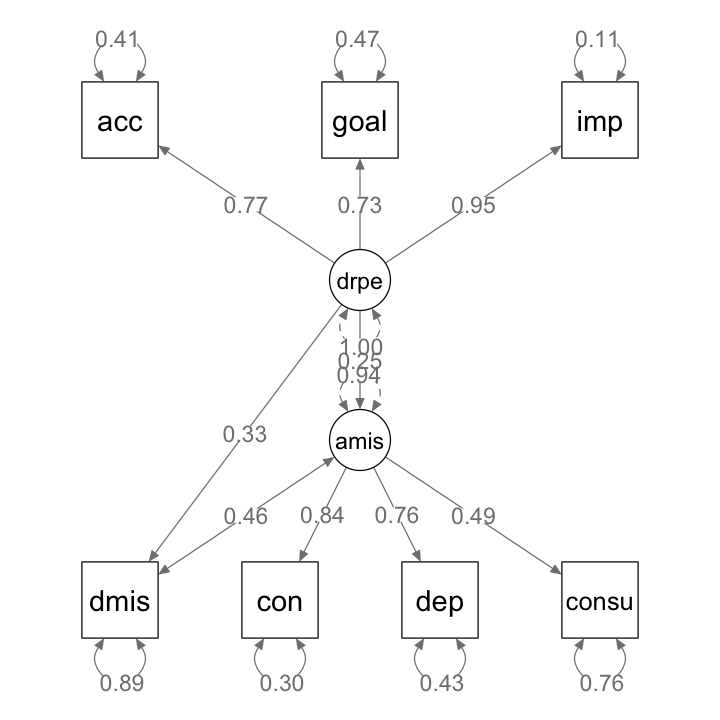

In [24]:
semPaths(fit,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

Gli autori esplorano un modello alternativo nel quale le relazioni causali vengono rovesciate: in questo caso è la difficoltà di regolazione delle emozioni positive ad essere la variabile esogena, e l'abuso di sostanze e l'abuso di alcol sono le variabili esogene.

In [25]:
mod_alt <- "
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  drpe ~ amis + dmis
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
"

In [26]:
fit_alt <- sem(mod_alt, sample.cov = dat_cov, sample.nobs = 311)

In [27]:
standardizedSolution(fit_alt)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
drpe,=~,acc,0.7700390,0.02945513,26.142778,0.000000e+00,0.71230804,0.8277701
drpe,=~,goal,0.7282103,0.03184951,22.864099,0.000000e+00,0.66578645,0.7906342
drpe,=~,imp,0.9451387,0.02296887,41.148681,0.000000e+00,0.90012057,0.9901569
amis,=~,con,0.8365273,0.03767659,22.202841,0.000000e+00,0.76268257,0.9103721
amis,=~,dep,0.7561043,0.03922486,19.276153,0.000000e+00,0.67922501,0.8329836
amis,=~,consu,0.4943142,0.05004701,9.876996,0.000000e+00,0.39622382,0.5924045
drpe,~,amis,0.1153885,0.07450156,1.548807,1.214282e-01,-0.03063185,0.2614089
drpe,~,dmis,0.2756131,0.06578954,4.189314,2.797988e-05,0.14666793,0.4045582
amis,~~,dmis,0.5026364,0.04965885,10.121787,0.000000e+00,0.40530679,0.5999659


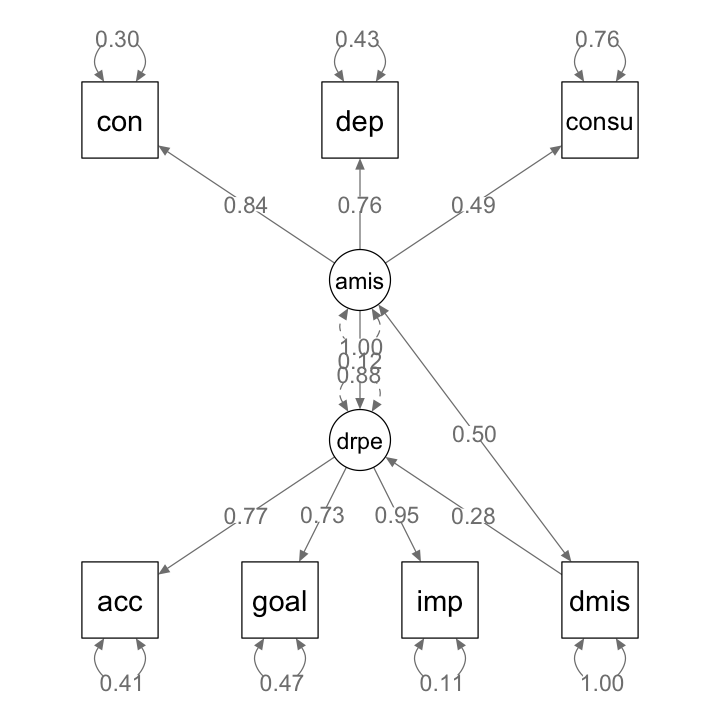

In [28]:
semPaths(fit_alt,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

Vedremo in seguito come sia possibile eseguire un test statistico per stabilire quale di due modelli sia più appropriato.

In [29]:
lavTestLRT(fit, fit_alt)

Warning message in lavTestLRT(fit, fit_alt):
"lavaan WARNING: some models have the same degrees of freedom"


,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit,12,4963.574,5021.958,38.21106,NA,NA,NA,NA
fit_alt,12,5433.089,5492.925,41.84380,3.632742,0,0,NA


## Considerazioni Conclusive

Nel corso di questo capitolo, abbiamo esplorato la versatilità e la complessità dei Modelli di Equazioni Strutturali (SEM). Abbiamo appreso come i SEM siano strumenti potenti nell'analisi statistica, in grado di delineare relazioni non solo tra variabili manifeste, ma anche tra quelle latenti. Questi modelli si distinguono per la loro capacità di integrare il modello di misurazione, che definisce le relazioni tra gli indicatori e le variabili latenti, con il modello strutturale, che stabilisce le connessioni tra le variabili latenti stesse.

Attraverso gli esempi presentati, è emerso chiaramente che i SEM superano i confini dei tradizionali modelli lineari, che si limitano alle relazioni tra variabili manifeste. La loro complessità va oltre quella dei semplici diagrammi di percorso, dato il loro coinvolgimento con variabili latenti. Inoltre, rispetto ai modelli fattoriali, i SEM offrono l'aggiunta significativa di poter esplorare relazioni causali o di regressione tra le variabili latenti, ampliando notevolmente il campo di applicazione e di interpretazione dei dati.

Nel prosieguo del testo, affronteremo argomenti cruciali legati ai SEM. Tra questi, la valutazione della bontà di adattamento del modello ai dati assume un ruolo primario, poiché consente di verificare quanto efficacemente il modello rifletta la realtà osservata. Il confronto tra modelli alternativi sarà un altro punto focale, utile per determinare la configurazione più aderente alla struttura dei dati. Esamineremo inoltre l'adattamento dei modelli a gruppi diversi, un aspetto fondamentale per comprendere la generalizzabilità e la specificità dei modelli.

La gestione di dati categoriali nei SEM, i modelli SEM multilivello, e il trattamento dei dati mancanti rappresentano ulteriori sfide metodologiche che affronteremo, ognuna delle quali porta con sé implicazioni significative per l'analisi e l'interpretazione dei risultati. Questi temi, insieme alle altre considerazioni metodologiche, costituiranno il fulcro delle prossime discussioni, mirando a fornire una comprensione più profonda e un'applicazione più efficace dei Modelli di Equazioni Strutturali.